Code for Variance Hammer's Analysis of Curse of the Wulfen
==============================
This code is for the analysis accompanying the post on the Warzone Fenris supplement. The text of the post itself can be found at: http://www.variancehammer.com. Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

**Import the necessary libraries**  

These are easily obtained using the Anaconda Python Distribution, which is available free from http://www.continuum.io

In [2]:
%matplotlib inline

/Users/elofgren/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import division

In [4]:
# Graphic and Simulation parameters
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
runs = 10000

As there is no Variance Hammer library available (yet), we need to define a couple useful functions. DiceRoller() is a function to roll an arbitrary number of d6 dice. Shooting() does what it says on the tin - it takes a number of shots, rolls the appropriate number of d6 dice, checks those results against Ballistic Skill, and if the shots are twin-linked, rerolls as appropriate. Note that at the moment this function does not work for BS values above 6.

In [5]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

Analysis of Elite CC Unit Mobility

In [6]:
move = np.empty([runs,3])

In [7]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots < (7-BS)] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    if rend ==1:
        auto == 1
    else:
        pass
    
    if auto == 0:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            saverolls = DiceRoller(wounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
            
    else:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            autowounds = np.sum(woundrolls>=auto)
            if rend == 1:
                rends = np.sum(woundrolls>=6)
            else:
                rends = 0  
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            if ToWound > 6:
                truewounds = autowounds
            else:
                truewounds = wounds
            saverolls = DiceRoller(truewounds-rends)
            if rend == 0:
                unsaved = np.sum(saverolls<(save))
            else:
                unsaved = np.sum(saverolls<(save)+rends)
            finalwounds = unsaved
        
    return finalwounds

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


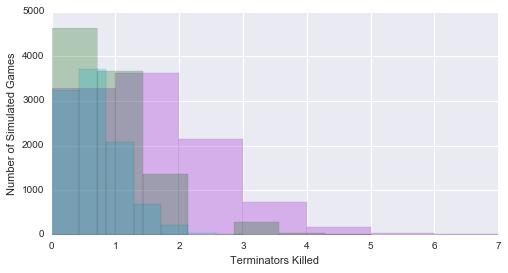

In [8]:
# def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
def BoltersStandard():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,4,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds)

def Bolters2W():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,4,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds/2)

def BoltersT5():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds)

bolters = np.empty([runs,3])

for e in range(runs):
    bolters[e][0] = BoltersStandard()
    bolters[e][1] = Bolters2W()
    bolters[e][2] = BoltersT5()

plt.hist(bolters[:,0],bins=7,alpha=0.25,color="DarkViolet")
plt.hist(bolters[:,1],bins=7,alpha=0.25,color="DeepSkyBlue")
plt.hist(bolters[:,2],bins=7,alpha=0.25,color="DarkGreen")
plt.xlabel("Terminators Killed")
plt.ylabel("Number of Simulated Games")  

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


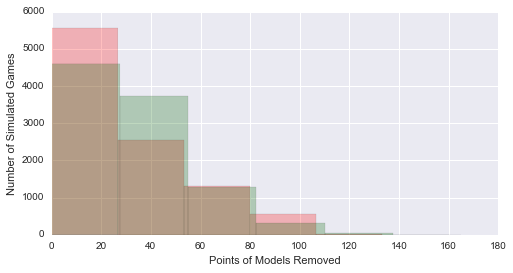

In [9]:
def BoltersT5():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds)

def BoltersVTW():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,3,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds/2)

pulse = np.empty([runs,3])

for f in range(runs):
    pulse[f][0] = BoltersT5()*33
    pulse[f][1] = BoltersVTW()*40

plt.hist(pulse[:,1],bins=6,alpha=0.25,color="Red")
plt.hist(pulse[:,0],bins=6,alpha=0.25,color="DarkGreen")
plt.xlabel("Points of Models Removed")
plt.ylabel("Number of Simulated Games") 

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


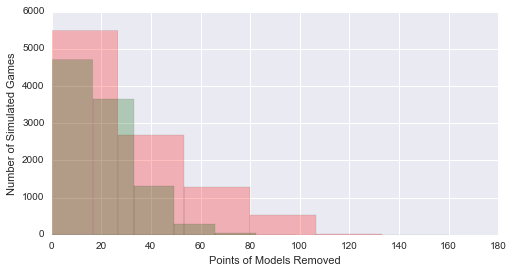

In [10]:
def BoltersT5():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,2,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds/2)

def BoltersVTW():
    BolterShots = Shooting(4,20,'N')[1]
    BolterWounds = Wounding(4,5,3,BolterShots,1,rend=0,auto=0)
    return float(BolterWounds/2)

pulse = np.empty([runs,3])

for f in range(runs):
    pulse[f][0] = BoltersT5()*33
    pulse[f][1] = BoltersVTW()*40

plt.hist(pulse[:,1],bins=6,alpha=0.25,color="Red")
plt.hist(pulse[:,0],bins=6,alpha=0.25,color="DarkGreen")
plt.xlabel("Points of Models Removed")
plt.ylabel("Number of Simulated Games") 

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


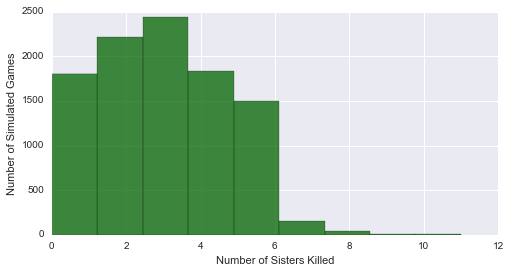

In [11]:
def ScatterLaservsT3():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,3,3,Shots,1,rend=0,auto=0)
    return float(Wounds)

sisters = np.empty([runs,1])

for g in range(runs):
    sisters[g][0] = ScatterLaservsT3()

plt.hist(sisters[:,0],bins=9,alpha=0.75,color="DarkGreen")
plt.xlabel("Number of Sisters Killed")
plt.ylabel("Number of Simulated Games") 

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


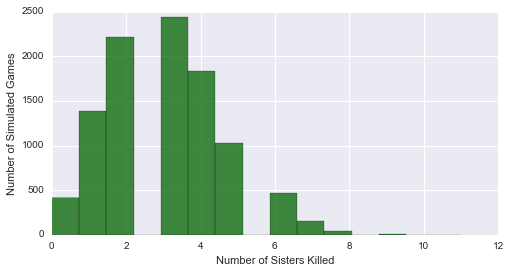

In [16]:
def ScatterLaservsCul():
    Shots = Shooting(1,20,'N')[1]
    Wounds = Wounding(4,4,4,Shots,1,rend=0,auto=0)
    return float(Wounds)

cul = np.empty([runs,1])

for g in range(runs):
    cul[g][0] = ScatterLaservsCul()

plt.hist(sisters[:,0],bins=15,alpha=0.75,color="DarkGreen")
plt.xlabel("Number of Sisters Killed")
plt.ylabel("Number of Simulated Games") 

In [ ]:
def ScatterLaservsT3():
    Shots = Shooting(4,20,'N')[1]
    Wounds = Wounding(4,3,3,Shots,1,rend=0,auto=0)
    return float(Wounds)

sisters = np.empty([runs,1])

for g in range(runs):
    sisters[g][0] = ScatterLaservsT3()

plt.hist(sisters[:,0],bins=9,alpha=0.75,color="DarkGreen")
plt.xlabel("Number of Sisters Killed")
plt.ylabel("Number of Simulated Games") 